＃ビュッフェ形式を再現してみる

In [28]:
#defining the libraries and the environment variables
import os
from dotenv import load_dotenv
import openai
import pandas as pd
import numpy as np
import re
import random

load_dotenv()

API_KEY = os.environ.get("OPENAI_API_KEY")
#print(API_KEY)
openai.api_key = API_KEY

pd.set_option('display.max_colwidth', None)

In [29]:
#define role
attribute_list = ["College student", "Graduate student", "College teacher"]
sex_list = ["male", "female"]
fisique_list = ["fat", "normal", "skinny"]


In [30]:
prompt="During a lunch break, you are in the college cafeteria where various meal options are available. Please choose your lunch.\n\
You don't have to choose from the entire menu.Please think about how much you eat and take the right amount.\n\
When responding, please consider each option independently to ensure your selection is based solely on your preference.\n\
Answer only the menu you chose.\n\
"

In [31]:
choice_1 = "Dynamite chili and tangy lime-seasoned beets"
choice_2 = "Beets"
choice_3 = "Lighter-choice beets with no added sugar"
choice_4 = "High-antioxidant beets"

choice_list = [choice_1, choice_2, choice_3, choice_4]

In [32]:
def generate_completion(role, choice, prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo-2024-04-09",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},{choice}"}
        ],
        temperature=0.7,
        max_tokens=100,
        )
    return response

In [33]:
import requests
from bs4 import BeautifulSoup

# URL of the page
url = "https://gakushoku.coop/search"

# Send HTTP request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Using the XPath provided as reference to create a similar BeautifulSoup search.
    # Let's break the XPath to guess the CSS selectors: '//*[@id="__next"]/section/div/div[3]/div[2]/div/section/ul/li[1]/div[2]/a/p[2]'
    # This can be roughly translated to CSS Selector: '#__next > section > div > div:nth-child(3) > div:nth-child(2) > div > section > ul > li:nth-child(1) > div:nth-child(2) > a > p:nth-child(2)'
    # You might need to adjust the selector based on actual page content.
    element = soup.select_one('#__next > section > div > div:nth-child(3) > div:nth-child(2) > div > section > ul > li:nth-child(1) > div:nth-child(2) > a > p:nth-child(2)')
    
    if element:
        # Print the text of the element
        print(element.text)
    else:
        print("Element not found.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Element not found.


In [34]:
import random

class Buffet_UTokyo:
    def __init__(self):
        self.choice_1 = "Dynamite chili and tangy lime-seasoned beets"
        self.choice_2 = "Beets"
        self.choice_3 = "Lighter-choice beets with no added sugar"
        self.choice_4 = "High-antioxidant beets"
        self.choice_list = [self.choice_1, self.choice_2, self.choice_3, self.choice_4]

        self.class_1 = "Main dish"
        self.class_2 = "Side dish, Salad"
        self.class_3 = "Rice"
        self.class_4 = "Noodles"
        
        # Main dish
        self.food_1 = [
            "Deep-fried succulent chicken",#手仕込みジューシー唐揚げ
            "Hamburger steak with arrabbiata sauce",#スパイシートマトハンバーグ
        #    "Grilled chicken with salt-based sauce",#グリルチキン（塩だれ）
            "Salt-grilled mackerel"#さば塩焼き
        ]
        # Side dish, Salad
        self.food_2 = [
        #    "French fries Spicy",#フライドポテト（スパイシー）
        #    "Soft-boiled egg",#温泉たまご
            "Boiled spinach",#ほうれん草のおひたし
            "Boiled chopped okura",#オクラのおひたし
            "Soy sauce taste boiled dried daikon radish strips",#切り干し大根
        #    "Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)",#ツナサラダ
        #    "Macaroni and corn salad (with wakame seaweed and shredded cabbage)"#マカロニ＆コーンサラダ
        ]
        # Rice
        self.food_3 = [
            "(Small size) Rice",#ごはん(小)
            "(Medium size) Rice",#ごはん(中)
            "(Large size) Rice"#ごはん(大)
        ]
        # Noodles
        self.food_4 = [
            "Plain udon noodles",#かけうどん
            "Zaru soba cool soba noodles",#ざるそば
            "Ramen in soy-sauce flavored soup"#醤油ラーメン
        ]

    def generate_buffet_prompt(self):
        #random_choice = "Dynamite chili and tangy lime-seasoned beets"#random.choice(self.choice_list)
        #self.food_2.append(random_choice)

        # Shuffle each food category list to randomize their order
        random.shuffle(self.food_1)
        random.shuffle(self.food_2)
        random.shuffle(self.food_3)
        random.shuffle(self.food_4)

        
        buffet_prompt = f"{self.class_1}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_1)) + "\n" \
                         f"{self.class_2}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_2)) + "\n" \
                         f"{self.class_3}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_3)) + "\n" \
                         f"{self.class_4}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_4))
        
        return buffet_prompt

# Instance creation and function call
buffet = Buffet_UTokyo()
buffet_prompt = buffet.generate_buffet_prompt()
print(buffet_prompt)


Main dish
1. Hamburger steak with arrabbiata sauce
2. Deep-fried succulent chicken
3. Salt-grilled mackerel
Side dish, Salad
1. Boiled chopped okura
2. Soy sauce taste boiled dried daikon radish strips
3. Boiled spinach
Rice
1. (Small size) Rice
2. (Medium size) Rice
3. (Large size) Rice
Noodles
1. Plain udon noodles
2. Ramen in soy-sauce flavored soup
3. Zaru soba cool soba noodles


In [35]:
words_list = ["apple", "banana", "cherry"]
text = "I ate an apple and a banana today, but I didn't see any."

# 各単語の出現回数をカウント
def count_words(text, words_list):
    counts = {word: text.count(word) for word in words_list}
    food_selected = []

    # 結果を表示
    for food, count in counts.items():
        if count > 0:
            food_selected.append(food)
            break
    return food_selected

# 関数を実行
vegetable_selected = count_words(text, words_list)
print(vegetable_selected)

['apple']


In [36]:
food_list = buffet.food_1 + buffet.food_2 + buffet.food_3 + buffet.food_4

def buffet_vegetable_preference(prompt,range_number):
    global food_list

    df = pd.DataFrame()

    for i in range(range_number):
        attribute = "college student"
        #attribute = random.choice(attribute_list)

        role = f"you are {attribute}."
        #you have to behave like {attribute}."

        buffet_prompt = buffet.generate_buffet_prompt()

        response = generate_completion(role, buffet_prompt, prompt)
        content = response.choices[0].message.content

        #extract number from responce
        counts = {food: content.count(food) for food in food_list}


        df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":[counts]},index=[0])

        df = pd.concat([df,df_sample],ignore_index=True)
    return df


In [40]:
from collections import Counter
import pandas as pd

# Example DataFrame
df_2 = pd.DataFrame({
    "number": [
        {'a': 1, 'b': 2},
        {'a': 2, 'c': 3},
        {'b': 1, 'd': 4},
        {'a': 1, 'd': 2},
        {'c': 1, 'e': 2}
    ]
})

result_dict = Counter()  # Start with an empty Counter object for simplicity

# Loop through each dictionary stored in the DataFrame's "number" column
for i in range(len(df_2)):
    dic_1 = df_2["number"][i]
    # Update the result counter by adding counts from the current dictionary
    result_dict.update(dic_1)

# Print the final summed dictionary
print(result_dict)

Counter({'d': 6, 'a': 4, 'c': 4, 'b': 3, 'e': 2})


In [42]:
from collections import Counter

result_dict = Counter()
for i in range(len(df_1)):
    dic_1 = df_1["number"][i]
    # Update the result counter by adding counts from the current dictionary
    result_dict.update(dic_1)

# Print the final summed dictionary
print(result_dict)


Counter({'Boiled spinach': 5, '(Medium size) Rice': 4, 'Zaru soba cool soba noodles': 4, 'Deep-fried succulent chicken': 3, 'Salt-grilled mackerel': 2, '(Small size) Rice': 1, 'Plain udon noodles': 1, 'Hamburger steak with arrabbiata sauce': 0, 'Soy sauce taste boiled dried daikon radish strips': 0, 'Boiled chopped okura': 0, '(Large size) Rice': 0, 'Ramen in soy-sauce flavored soup': 0})


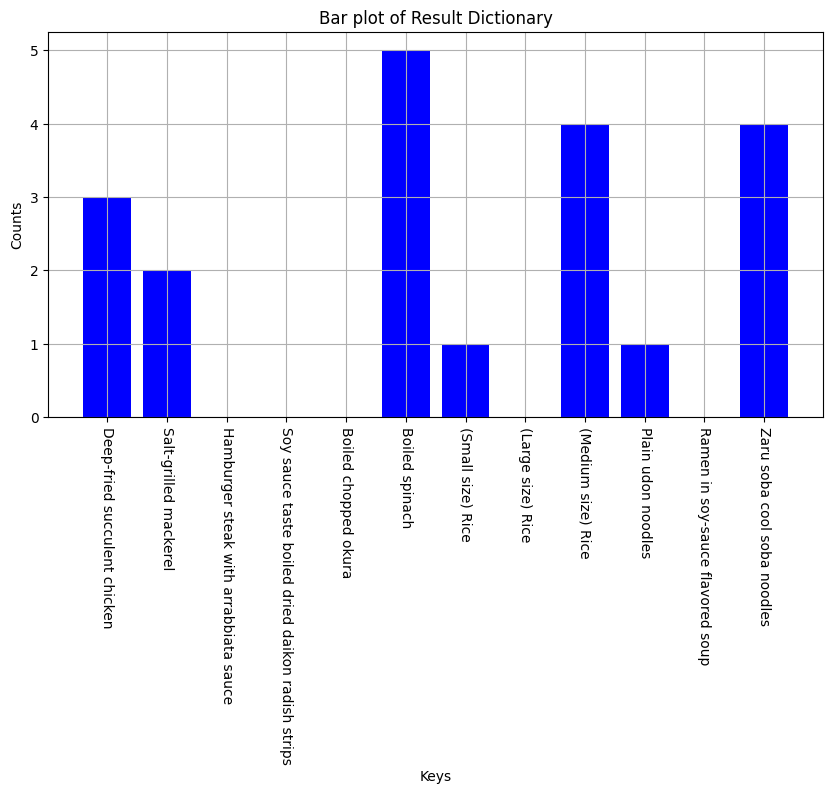

In [46]:
import matplotlib.pyplot as plt


# Creating a bar plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.bar(result_dict.keys(), result_dict.values(), color='blue')  # Create a bar plot

plt.xlabel('Keys')  # Label on X-axis
plt.ylabel('Counts')  # Label on Y-axis
plt.title('Bar plot of Result Dictionary')  # Title of the plot

plt.xticks(rotation=270)  # Rotate x-axis labels for better visibility if required
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot

In [22]:
df_1 = buffet_vegetable_preference(prompt,5)
df_1.head()

,attribute,response,number
0,college student,"Main dish: 2. Deep-fried succulent chicken\nSide dish, Salad: 3. Boiled spinach\nRice: 1. (Small size) Rice\nNoodles: 3. Zaru soba cool soba noodles","{'Deep-fried succulent chicken': 1, 'Salt-grilled mackerel': 0, 'Hamburger steak with arrabbiata sauce': 0, 'Soy sauce taste boiled dried daikon radish strips': 0, 'Boiled chopped okura': 0, 'Boiled spinach': 1, '(Small size) Rice': 1, '(Large size) Rice': 0, '(Medium size) Rice': 0, 'Plain udon noodles': 0, 'Ramen in soy-sauce flavored soup': 0, 'Zaru soba cool soba noodles': 1}"
1,college student,"Main dish: 2. Deep-fried succulent chicken\nSide dish, Salad: 2. Boiled spinach\nRice: 2. (Medium size) Rice\nNoodles: 3. Plain udon noodles","{'Deep-fried succulent chicken': 1, 'Salt-grilled mackerel': 0, 'Hamburger steak with arrabbiata sauce': 0, 'Soy sauce taste boiled dried daikon radish strips': 0, 'Boiled chopped okura': 0, 'Boiled spinach': 1, '(Small size) Rice': 0, '(Large size) Rice': 0, '(Medium size) Rice': 1, 'Plain udon noodles': 1, 'Ramen in soy-sauce flavored soup': 0, 'Zaru soba cool soba noodles': 0}"
2,college student,"Main dish: 3. Salt-grilled mackerel\nSide dish, Salad: 3. Boiled spinach\nRice: 2. (Medium size) Rice\nNoodles: 3. Zaru soba cool soba noodles","{'Deep-fried succulent chicken': 0, 'Salt-grilled mackerel': 1, 'Hamburger steak with arrabbiata sauce': 0, 'Soy sauce taste boiled dried daikon radish strips': 0, 'Boiled chopped okura': 0, 'Boiled spinach': 1, '(Small size) Rice': 0, '(Large size) Rice': 0, '(Medium size) Rice': 1, 'Plain udon noodles': 0, 'Ramen in soy-sauce flavored soup': 0, 'Zaru soba cool soba noodles': 1}"
3,college student,"Main dish: 2. Deep-fried succulent chicken\nSide dish, Salad: 3. Boiled spinach\nRice: 3. (Medium size) Rice\nNoodles: 2. Zaru soba cool soba noodles","{'Deep-fried succulent chicken': 1, 'Salt-grilled mackerel': 0, 'Hamburger steak with arrabbiata sauce': 0, 'Soy sauce taste boiled dried daikon radish strips': 0, 'Boiled chopped okura': 0, 'Boiled spinach': 1, '(Small size) Rice': 0, '(Large size) Rice': 0, '(Medium size) Rice': 1, 'Plain udon noodles': 0, 'Ramen in soy-sauce flavored soup': 0, 'Zaru soba cool soba noodles': 1}"
4,college student,"Main dish: 3. Salt-grilled mackerel\nSide dish, Salad: 2. Boiled spinach\nRice: 3. (Medium size) Rice\nNoodles: 1. Zaru soba cool soba noodles","{'Deep-fried succulent chicken': 0, 'Salt-grilled mackerel': 1, 'Hamburger steak with arrabbiata sauce': 0, 'Soy sauce taste boiled dried daikon radish strips': 0, 'Boiled chopped okura': 0, 'Boiled spinach': 1, '(Small size) Rice': 0, '(Large size) Rice': 0, '(Medium size) Rice': 1, 'Plain udon noodles': 0, 'Ramen in soy-sauce flavored soup': 0, 'Zaru soba cool soba noodles': 1}"


In [11]:
df_1 = buffet_vegetable_preference(prompt,30)
#df_2 = buffet_vegetable_preference(choice_2,prompt,50)
df_1.head(30)

,attribute,response,number,selected_vegetable
0,college student,Hamburger steak with arrabbiata sauce\nDynamite chili and tangy lime-seasoned beets\n(Medium size) Rice,True,Dynamite chili and tangy lime-seasoned beets
1,college student,"I'll go with the salt-grilled mackerel for the main dish. For the side dish, I'll have the boiled spinach. I'd like a medium size rice, and for noodles, I'll choose the zaru soba cool soba noodles.",False,Dynamite chili and tangy lime-seasoned beets
2,college student,"I'll have the deep-fried succulent chicken for my main dish, with a side of boiled spinach, and a medium size rice.",False,Dynamite chili and tangy lime-seasoned beets
3,college student,Main dish: Salt-grilled mackerel\nSide dish: Boiled spinach\nRice: (Medium size) Rice,False,Dynamite chili and tangy lime-seasoned beets
4,college student,Main dish: Salt-grilled mackerel\nSide dish: Soy sauce taste boiled dried daikon radish strips\nRice: (Medium size) Rice,False,Dynamite chili and tangy lime-seasoned beets
5,college student,Hamburger steak with arrabbiata sauce\nBoiled spinach\n(Medium size) Rice,False,Dynamite chili and tangy lime-seasoned beets
6,college student,"Main dish: 2. Deep-fried succulent chicken\nSide dish, Salad: 4. Boiled spinach\nRice: 3. (Medium size) Rice",False,Dynamite chili and tangy lime-seasoned beets
7,college student,Main dish: Deep-fried succulent chicken\nSide dish: Boiled spinach\nRice: (Medium size) Rice,False,Dynamite chili and tangy lime-seasoned beets
8,college student,Main dish: 3. Salt-grilled mackerel\nSide dish: 13. Boiled spinach\nRice: 2. (Small size) Rice\nNoodles: 3. Zaru soba cool soba noodles,False,Dynamite chili and tangy lime-seasoned beets
9,college student,Salt-grilled mackerel\nBoiled spinach\n(Medium size) Rice,False,Dynamite chili and tangy lime-seasoned beets


In [12]:
x = 1
y = 2
result = x or y
print(result)

result = x | y
print(result)

1
3


KeyError: False

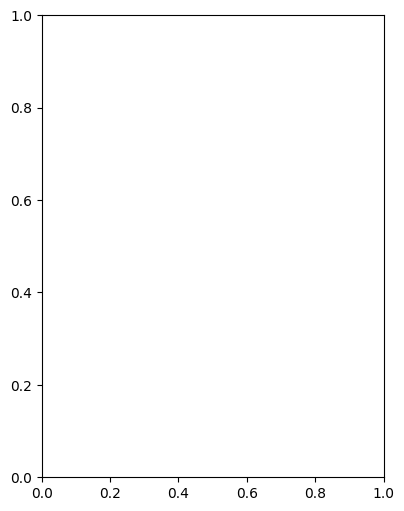

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define dictionaries to map numeric values to descriptive labels
choice_1_dic = {
    1: "Dynamite chili and \n tangy lime-seasoned beets",
    2: "Beets",
    3: "Lighter-choice beets \n with no added sugar",
    4: "High-antioxidant beets"
}

choice_2_dic = {
    1:"Beets",
    2:"Dynamite chili and \n tangy lime-seasoned beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"High-antioxidant beets"
}


choice_3_dic = {
    1:"Higher-antioxidant beets",
    2:"Beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"Dynamite chili and \n tangy lime-seasoned beets"
}

column = "number"

# Define a function to plot frequency of numbers associated with descriptive labels
def plot_frequency(df,column,choice_dic, ax):
    frequency = df[column].value_counts().sort_index()
    frequency.index = frequency.index.map(lambda x: choice_dic[x])
    desired_order = list(choice_1_dic.values())
    frequency = frequency.reindex(desired_order)
    frequency.plot(kind='bar', ax=ax)
    ax.set_xlabel('label')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {column}')
    ax.tick_params(axis='x', rotation=0)

# Create DataFrame 1 (df_1) and DataFrame 2 (df_2) before calling this function

# Plot frequency for DataFrame 1
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 3, 1)
plot_frequency(df_1, column,choice_1_dic, ax1)

# Plot frequency for DataFrame 2
ax2 = plt.subplot(1, 3, 2)
plot_frequency(df_2, column,choice_2_dic, ax2)

#ax3 = plt.subplot(1, 3, 3)
#plot_frequency(df_3, column,choice_3_dic, ax3)

plt.tight_layout()
plt.show()
